In [80]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam, Adagrad, RMSprop

# from sklearn.metrics import accuracy_score, classification_report
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from sklearn.metrics import accuracy_score, classification_report
# Download VADER lexicon if not already downloaded
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad

In [81]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [82]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Text to analyze
text = "I don't have anyone to talk to and I don't know what to do anymore"

# Analyze sentiment
scores = sid.polarity_scores(text)

# Print sentiment scores
print("Sentiment Scores:", scores)

# Get positive score
positive_score = scores['pos']

print("Positive Score:", positive_score)

Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Positive Score: 0.0


In [83]:
scores['compound']

0.0

In [84]:
df=pd.read_csv('output_cl.csv')

In [85]:
# Function to calculate sentiment scores
def calculate_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores['compound'], scores['pos'], scores['neg'], scores['neu']

# Calculate sentiment scores for 'post_title' column
df[['title_compound_score', 'title_positive_score', 'title_negative_score', 'title_neutral_score']] = df['post_title'].apply(calculate_sentiment_scores).apply(pd.Series)

# Calculate sentiment scores for 'post_text' column
df[['text_compound_score', 'text_positive_score', 'text_negative_score', 'text_neutral_score']] = df['post_text'].apply(calculate_sentiment_scores).apply(pd.Series)

# Display the DataFrame with sentiment scores
df


,post_title,post_text,Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down,Feeling-down-depressed-or-hopeless,Feeling-tired-or-having-little-energy,Little-interest-or-pleasure-in-doing,Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual,Poor-appetite-or-overeating,Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way,Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television,Trouble-falling-or-staying-asleep-or-sleeping-too-much,title_compound_score,title_positive_score,title_negative_score,title_neutral_score,text_compound_score,text_positive_score,text_negative_score,text_neutral_score
0,I dont feel original anymore.,"When I was in high school a few years back, I ...",1,0,1,1,0,0,0,0,0,-0.2411,0.000,0.395,0.605,0.9799,0.156,0.077,0.766
1,I don’t have anyone to talk to and I don’t kno...,Nine years ago I was diagnosed with depression...,1,1,0,0,1,0,0,0,0,0.0000,0.000,0.000,1.000,-0.9969,0.073,0.234,0.693
2,Stuck between moving forward and killing myself,Some background information: My GF of almost 3...,1,1,1,1,0,0,1,0,0,-0.7506,0.000,0.561,0.439,-0.9976,0.137,0.192,0.671
3,I need help on how to help my girlfriend.,"My girlfriend ,of about 3 months now ,has been...",1,1,0,0,0,0,1,0,0,0.6597,0.474,0.000,0.526,0.8611,0.102,0.030,0.868
4,Ive been feeling this way for some tine,Im alway feeling like this. It doesnt even mat...,1,1,0,0,0,0,0,0,0,0.1280,0.176,0.000,0.824,-0.9506,0.113,0.162,0.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,I hate myself. I’m so sad. 😔,"I have been addicted, ashamed, miserable, and ...",1,0,0,0,0,0,0,0,0,-0.8267,0.000,0.719,0.281,-0.5507,0.195,0.220,0.585
1999,How do i force myself to go to the gym when i ...,Im always told exercise is good for people str...,1,1,0,1,0,0,0,0,0,0.0000,0.000,0.000,1.000,-0.8819,0.082,0.189,0.729
2000,Ive always been depressed but somethings diffe...,Lately Ive been having extreme difficulty leav...,1,1,0,0,0,0,0,1,0,-0.2846,0.000,0.264,0.736,-0.9776,0.051,0.163,0.786
2001,"My girlfriend wants to commit s, I dont know w...",Idk what to do. My girlfriend has been adaman...,1,1,1,0,0,0,1,0,0,0.5994,0.329,0.000,0.671,-0.9734,0.043,0.169,0.788


Correlation Matrix:


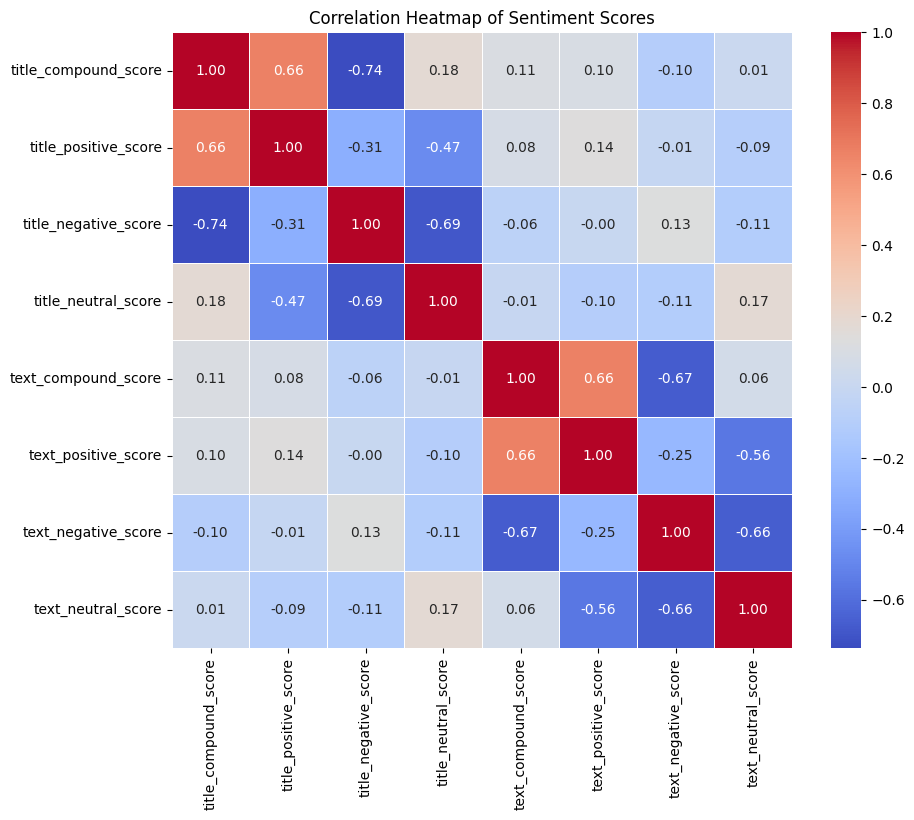

In [86]:
# Calculate the correlation matrix
correlation_matrix = df[['title_compound_score', 'title_positive_score', 'title_negative_score', 'title_neutral_score',
                         'text_compound_score', 'text_positive_score', 'text_negative_score', 'text_neutral_score']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
# print(correlation_matrix)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Sentiment Scores')
plt.show()

In [87]:
# Define the threshold for correlation
threshold = 0.5

# Get the upper triangular part of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than the threshold
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Drop the columns with high correlation
df.drop(columns=to_drop, inplace=True)

# Display the DataFrame after dropping highly correlated columns
df


,post_title,post_text,Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down,Feeling-down-depressed-or-hopeless,Feeling-tired-or-having-little-energy,Little-interest-or-pleasure-in-doing,Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual,Poor-appetite-or-overeating,Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way,Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television,Trouble-falling-or-staying-asleep-or-sleeping-too-much,title_compound_score,title_negative_score,title_neutral_score,text_compound_score,text_negative_score,text_neutral_score
0,I dont feel original anymore.,"When I was in high school a few years back, I ...",1,0,1,1,0,0,0,0,0,-0.2411,0.395,0.605,0.9799,0.077,0.766
1,I don’t have anyone to talk to and I don’t kno...,Nine years ago I was diagnosed with depression...,1,1,0,0,1,0,0,0,0,0.0000,0.000,1.000,-0.9969,0.234,0.693
2,Stuck between moving forward and killing myself,Some background information: My GF of almost 3...,1,1,1,1,0,0,1,0,0,-0.7506,0.561,0.439,-0.9976,0.192,0.671
3,I need help on how to help my girlfriend.,"My girlfriend ,of about 3 months now ,has been...",1,1,0,0,0,0,1,0,0,0.6597,0.000,0.526,0.8611,0.030,0.868
4,Ive been feeling this way for some tine,Im alway feeling like this. It doesnt even mat...,1,1,0,0,0,0,0,0,0,0.1280,0.000,0.824,-0.9506,0.162,0.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,I hate myself. I’m so sad. 😔,"I have been addicted, ashamed, miserable, and ...",1,0,0,0,0,0,0,0,0,-0.8267,0.719,0.281,-0.5507,0.220,0.585
1999,How do i force myself to go to the gym when i ...,Im always told exercise is good for people str...,1,1,0,1,0,0,0,0,0,0.0000,0.000,1.000,-0.8819,0.189,0.729
2000,Ive always been depressed but somethings diffe...,Lately Ive been having extreme difficulty leav...,1,1,0,0,0,0,0,1,0,-0.2846,0.264,0.736,-0.9776,0.163,0.786
2001,"My girlfriend wants to commit s, I dont know w...",Idk what to do. My girlfriend has been adaman...,1,1,1,0,0,0,1,0,0,0.5994,0.000,0.671,-0.9734,0.169,0.788


In [88]:
from sklearn.preprocessing import MaxAbsScaler

# Assuming 'data' is your DataFrame with the features to be scaled

# Initialize the MaxAbsScaler
scaler = MaxAbsScaler()

# Select the columns to be scaled
columns_to_scale = ['title_compound_score',
 'title_negative_score',
 'title_neutral_score',
 'text_compound_score',
 'text_negative_score',
 'text_neutral_score']  # Replace with your column names

# Fit the scaler to the selected columns and transform them
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [89]:
df

,post_title,post_text,Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down,Feeling-down-depressed-or-hopeless,Feeling-tired-or-having-little-energy,Little-interest-or-pleasure-in-doing,Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual,Poor-appetite-or-overeating,Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way,Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television,Trouble-falling-or-staying-asleep-or-sleeping-too-much,title_compound_score,title_negative_score,title_neutral_score,text_compound_score,text_negative_score,text_neutral_score
0,I dont feel original anymore.,"When I was in high school a few years back, I ...",1,0,1,1,0,0,0,0,0,-0.252408,0.395,0.605,0.979998,0.195929,0.766
1,I don’t have anyone to talk to and I don’t kno...,Nine years ago I was diagnosed with depression...,1,1,0,0,1,0,0,0,0,0.000000,0.000,1.000,-0.997000,0.595420,0.693
2,Stuck between moving forward and killing myself,Some background information: My GF of almost 3...,1,1,1,1,0,0,1,0,0,-0.785804,0.561,0.439,-0.997700,0.488550,0.671
3,I need help on how to help my girlfriend.,"My girlfriend ,of about 3 months now ,has been...",1,1,0,0,0,0,1,0,0,0.690641,0.000,0.526,0.861186,0.076336,0.868
4,Ive been feeling this way for some tine,Im alway feeling like this. It doesnt even mat...,1,1,0,0,0,0,0,0,0,0.134003,0.000,0.824,-0.950695,0.412214,0.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,I hate myself. I’m so sad. 😔,"I have been addicted, ashamed, miserable, and ...",1,0,0,0,0,0,0,0,0,-0.865473,0.719,0.281,-0.550755,0.559796,0.585
1999,How do i force myself to go to the gym when i ...,Im always told exercise is good for people str...,1,1,0,1,0,0,0,0,0,0.000000,0.000,1.000,-0.881988,0.480916,0.729
2000,Ive always been depressed but somethings diffe...,Lately Ive been having extreme difficulty leav...,1,1,0,0,0,0,0,1,0,-0.297948,0.264,0.736,-0.977698,0.414758,0.786
2001,"My girlfriend wants to commit s, I dont know w...",Idk what to do. My girlfriend has been adaman...,1,1,1,0,0,0,1,0,0,0.627513,0.000,0.671,-0.973497,0.430025,0.788


In [90]:
['post_title', 'post_text',
       'Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
       'Feeling-down-depressed-or-hopeless',
       'Feeling-tired-or-having-little-energy',
       'Little-interest-or-pleasure-in-doing',
       'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
       'Poor-appetite-or-overeating',
       'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
       'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
       'Trouble-falling-or-staying-asleep-or-sleeping-too-much',
       'title_compound_score', 'title_negative_score', 'title_neutral_score',
       'text_compound_score', 'text_negative_score', 'text_neutral_score']

['post_title',
 'post_text',
 'Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
 'Feeling-down-depressed-or-hopeless',
 'Feeling-tired-or-having-little-energy',
 'Little-interest-or-pleasure-in-doing',
 'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
 'Poor-appetite-or-overeating',
 'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
 'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
 'Trouble-falling-or-staying-asleep-or-sleeping-too-much',
 'title_compound_score',
 'title_negative_score',
 'title_neutral_score',
 'text_compound_score',
 'text_negative_score',
 'text_neutral_score']

#1)'Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down'

In [102]:

# Load your dataset
# Assuming you have a DataFrame called 'data' with features and target columns
# Replace 'features' with your feature columns and 'targets' with your target columns

# Split data into features and targets
X = df[[ 'title_compound_score', 'title_negative_score', 'title_neutral_score',
       'text_compound_score', 'text_negative_score', 'text_neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df[ 'Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down']     # Replace 'target1', 'target2', ... with your target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Reshape the data for 1D CNN
# X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the ANN model with increased layers
model0 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate if necessary
model0.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model0.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model0.predict(X_test)>0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Epoch 1/50
12/12 [==============================] - 1s 14ms/step - loss: 0.6331 - accuracy: 0.6634 - val_loss: 0.5232 - val_accuracy: 0.8571
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5183 - accuracy: 0.8168 - val_loss: 0.4292 - val_accuracy: 0.8571
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.4890 - accuracy: 0.8272 - val_loss: 0.4221 - val_accuracy: 0.8571
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4860 - accuracy: 0.8286 - val_loss: 0.4235 - val_accuracy: 0.8571
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5046 - accuracy: 0.8300 - val_loss: 0.4277 - val_accuracy: 0.8571
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.8286 - val_loss: 0.4281 - val_accuracy: 0.8571
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4801 - accuracy: 0.8307 - val_loss: 0.4277 - val_accuracy: 0.8571
Epoch 8/50
12/12 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#2)'Feeling-down-depressed-or-hopeless'

In [103]:

# Load your dataset
# Assuming you have a DataFrame called 'data' with features and target columns
# Replace 'features' with your feature columns and 'targets' with your target columns

# Split data into features and targets
X = df[[ 'title_compound_score', 'title_negative_score', 'title_neutral_score',
       'text_compound_score', 'text_negative_score', 'text_neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df['Feeling-down-depressed-or-hopeless']     # Replace 'target1', 'target2', ... with your target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Reshape the data for 1D CNN
# X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the ANN model with increased layers
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),  # New layer added
    Dropout(0.5),                   # Dropout layer added
    Dense(8, activation='relu'),   # New layer added
    Dropout(0.5),                  # Dropout layer added
    Dense(1, activation='sigmoid')
])

# Compile the model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model1.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model1.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Epoch 1/50
12/12 [==============================] - 1s 17ms/step - loss: 0.7057 - accuracy: 0.5357 - val_loss: 0.6581 - val_accuracy: 0.7640
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6484 - accuracy: 0.6287 - val_loss: 0.6215 - val_accuracy: 0.8323
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6279 - accuracy: 0.7071 - val_loss: 0.5795 - val_accuracy: 0.8323
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.7696 - val_loss: 0.5470 - val_accuracy: 0.8323
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5646 - accuracy: 0.7772 - val_loss: 0.5135 - val_accuracy: 0.8323
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.7918 - val_loss: 0.4887 - val_accuracy: 0.8323
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5518 - accuracy: 0.7939 - val_loss: 0.4783 - val_accuracy: 0.8323
Epoch 8/50
12/12 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3)'Feeling-tired-or-having-little-energy'

In [104]:

# Load your dataset
# Assuming you have a DataFrame called 'data' with features and target columns
# Replace 'features' with your feature columns and 'targets' with your target columns

# Split data into features (X) and target (y)
X = df[['title_compound_score', 'title_negative_score', 'title_neutral_score',
        'text_compound_score', 'text_negative_score', 'text_neutral_score']]
y = df['Feeling-tired-or-having-little-energy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Define the ANN model with increased layers
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),  # Additional hidden layer
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(32, activation='relu'),  # Additional hidden layer
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(16, activation='relu'),  # Additional hidden layer
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model2.compile(optimizer=Adam(lr=0.001),  # Adam optimizer with a learning rate of 0.001
              loss='binary_crossentropy',  # Binary cross-entropy loss function
              metrics=['accuracy'])

# Print model summary
model2.summary()

# Train the model
history = model2.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
y_pred = (model2.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_310 (Dense)           (None, 128)               896       
                                                                 
 dropout_243 (Dropout)       (None, 128)               0         
                                                                 
 dense_311 (Dense)           (None, 64)                8256      
                                                                 
 dropout_244 (Dropout)       (None, 64)                0         
                                                                 
 dense_312 (Dense)           (None, 32)                2080      
                                                                 
 dropout_245 (Dropout)       (None, 32)                0         
                                                                 
 dense_313 (Dense)           (None, 16)              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#4)'Little-interest-or-pleasure-in-doing'

In [105]:

# Load your dataset
# Assuming you have a DataFrame called 'data' with features and target columns
# Replace 'features' with your feature columns and 'targets' with your target columns

# Split data into features and targets
X = df[[ 'title_compound_score', 'title_negative_score', 'title_neutral_score',
       'text_compound_score', 'text_negative_score', 'text_neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df['Little-interest-or-pleasure-in-doing']     # Replace 'target1', 'target2', ... with your target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Define the ANN model with increased layers
model3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),  # Additional hidden layer
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(32, activation='relu'),  # Additional hidden layer
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(16, activation='relu'),  # Additional hidden layer
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model3.compile(optimizer=Adam(lr=0.001),  # Adam optimizer with a learning rate of 0.001
              loss='binary_crossentropy',  # Binary cross-entropy loss function
              metrics=['accuracy'])

# Print model summary
model3.summary()

# Train the model
history = model3.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
y_pred = (model3.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_315 (Dense)           (None, 128)               896       
                                                                 
 dropout_247 (Dropout)       (None, 128)               0         
                                                                 
 dense_316 (Dense)           (None, 64)                8256      
                                                                 
 dropout_248 (Dropout)       (None, 64)                0         
                                                                 
 dense_317 (Dense)           (None, 32)                2080      
                                                                 
 dropout_249 (Dropout)       (None, 32)                0         
                                                                 
 dense_318 (Dense)           (None, 16)              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#5)'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual'

In [106]:

# Load your dataset
# Assuming you have a DataFrame called 'data' with features and target columns
# Replace 'features' with your feature columns and 'targets' with your target columns

# Split data into features and targets
X = df[[ 'title_compound_score', 'title_negative_score', 'title_neutral_score',
       'text_compound_score', 'text_negative_score', 'text_neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df['Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual']     # Replace 'target1', 'target2', ... with your target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Reshape the data for 1D CNN
# X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the ANN model with increased layers
model4 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),  # New layer added
    Dropout(0.5),                   # Dropout layer added
    Dense(8, activation='relu'),   # New layer added
    Dropout(0.5),                  # Dropout layer added
    Dense(1, activation='sigmoid')
])

# Compile the model
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model4.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model4.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Epoch 1/50
12/12 [==============================] - 1s 16ms/step - loss: 0.7097 - accuracy: 0.5378 - val_loss: 0.6727 - val_accuracy: 0.7826
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 0.6813 - accuracy: 0.6273 - val_loss: 0.6532 - val_accuracy: 0.7826
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.6736 - accuracy: 0.6724 - val_loss: 0.6445 - val_accuracy: 0.7826
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.6919 - val_loss: 0.6370 - val_accuracy: 0.7826
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6592 - accuracy: 0.6884 - val_loss: 0.6275 - val_accuracy: 0.7826
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6497 - accuracy: 0.7155 - val_loss: 0.6177 - val_accuracy: 0.7826
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6539 - accuracy: 0.7176 - val_loss: 0.6110 - val_accuracy: 0.7826
Epoch 8/50
12/12 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#6)'Poor-appetite-or-overeating'

In [107]:

# Load your dataset
# Assuming you have a DataFrame called 'data' with features and target columns
# Replace 'features' with your feature columns and 'targets' with your target columns

# Split data into features and targets
X = df[[ 'title_compound_score', 'title_negative_score', 'title_neutral_score',
       'text_compound_score', 'text_negative_score', 'text_neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df['Poor-appetite-or-overeating']     # Replace 'target1', 'target2', ... with your target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Reshape the data for 1D CNN
# X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the ANN model with increased layers
model5 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),  # New layer added
    Dropout(0.5),                   # Dropout layer added
    Dense(8, activation='relu'),   # New layer added
    Dropout(0.5),                  # Dropout layer added
    Dense(1, activation='sigmoid')
])

# Compile the model
model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model5.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model5.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Epoch 1/50
12/12 [==============================] - 2s 34ms/step - loss: 0.7026 - accuracy: 0.5795 - val_loss: 0.6751 - val_accuracy: 0.8944
Epoch 2/50
12/12 [==============================] - 0s 10ms/step - loss: 0.6555 - accuracy: 0.7294 - val_loss: 0.6451 - val_accuracy: 0.8944
Epoch 3/50
12/12 [==============================] - 0s 12ms/step - loss: 0.6073 - accuracy: 0.8133 - val_loss: 0.5808 - val_accuracy: 0.8944
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 0.5535 - accuracy: 0.8425 - val_loss: 0.4991 - val_accuracy: 0.8944
Epoch 5/50
12/12 [==============================] - 0s 9ms/step - loss: 0.5008 - accuracy: 0.8647 - val_loss: 0.4271 - val_accuracy: 0.8944
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 0.4692 - accuracy: 0.8716 - val_loss: 0.3780 - val_accuracy: 0.8944
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.4539 - accuracy: 0.8772 - val_loss: 0.3599 - val_accuracy: 0.8944
Epoch 8/50
12/12 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 # 7)'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way'

In [108]:

# Load your dataset
# Assuming you have a DataFrame called 'data' with features and target columns
# Replace 'features' with your feature columns and 'targets' with your target columns

# Split data into features and targets
X = df[[ 'title_compound_score', 'title_negative_score', 'title_neutral_score',
       'text_compound_score', 'text_negative_score', 'text_neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df['Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way']     # Replace 'target1', 'target2', ... with your target columns


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Define the ANN model with increased layers
model6 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adagrad optimizer
optimizer = RMSprop(lr=0.001)  # Adjust learning rate as needed
model6.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model6.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model6.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))


Epoch 1/50
12/12 [==============================] - 1s 14ms/step - loss: 0.6943 - accuracy: 0.5475 - val_loss: 0.6839 - val_accuracy: 0.6211
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5649 - val_loss: 0.6816 - val_accuracy: 0.6211
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5906 - val_loss: 0.6788 - val_accuracy: 0.6211
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6802 - accuracy: 0.5899 - val_loss: 0.6770 - val_accuracy: 0.6211
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.5899 - val_loss: 0.6743 - val_accuracy: 0.6211
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.6093 - val_loss: 0.6727 - val_accuracy: 0.6211
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.6128 - val_loss: 0.6701 - val_accuracy: 0.6211
Epoch 8/50
12/12 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television'

In [109]:

# Load your dataset
# Assuming you have a DataFrame called 'data' with features and target columns
# Replace 'features' with your feature columns and 'targets' with your target columns

# Split data into features and targets
X = df[[ 'title_compound_score', 'title_negative_score', 'title_neutral_score',
       'text_compound_score', 'text_negative_score', 'text_neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df['Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television']     # Replace 'target1', 'target2', ... with your target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Reshape the data for 1D CNN
# X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the ANN model with increased layers
model7 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),  # New layer added
    Dropout(0.5),                   # Dropout layer added
    Dense(8, activation='relu'),   # New layer added
    Dropout(0.5),                  # Dropout layer added
    Dense(1, activation='sigmoid')
])

# Compile the model
model7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model7.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model7.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Epoch 1/50
12/12 [==============================] - 1s 25ms/step - loss: 0.5492 - accuracy: 0.8279 - val_loss: 0.4759 - val_accuracy: 0.8820
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 0.4882 - accuracy: 0.8709 - val_loss: 0.4129 - val_accuracy: 0.8820
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.4530 - accuracy: 0.8841 - val_loss: 0.3696 - val_accuracy: 0.8820
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.4693 - accuracy: 0.8862 - val_loss: 0.3612 - val_accuracy: 0.8820
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4349 - accuracy: 0.8897 - val_loss: 0.3634 - val_accuracy: 0.8820
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4622 - accuracy: 0.8952 - val_loss: 0.3649 - val_accuracy: 0.8820
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.4182 - accuracy: 0.8994 - val_loss: 0.3622 - val_accuracy: 0.8820
Epoch 8/50
12/12 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#'Trouble-falling-or-staying-asleep-or-sleeping-too-much'

In [110]:


# Load your dataset
# Assuming you have a DataFrame called 'data' with features and target columns
# Replace 'features' with your feature columns and 'targets' with your target columns

# Split data into features and targets
X = df[[ 'title_compound_score', 'title_negative_score', 'title_neutral_score',
       'text_compound_score', 'text_negative_score', 'text_neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df['Trouble-falling-or-staying-asleep-or-sleeping-too-much']     # Replace 'target1', 'target2', ... with your target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Reshape the data for 1D CNN
# X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the ANN model with increased layers
model8 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),  # New layer added
    Dropout(0.5),                   # Dropout layer added
    Dense(8, activation='relu'),   # New layer added
    Dropout(0.5),                  # Dropout layer added
    Dense(1, activation='sigmoid')
])

# Compile the model
model8.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model8.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model8.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Epoch 1/50
12/12 [==============================] - 1s 16ms/step - loss: 0.6720 - accuracy: 0.6794 - val_loss: 0.6827 - val_accuracy: 0.7888
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.7592 - val_loss: 0.6475 - val_accuracy: 0.7888
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.7821 - val_loss: 0.5950 - val_accuracy: 0.7888
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.7953 - val_loss: 0.5547 - val_accuracy: 0.7888
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5581 - accuracy: 0.8050 - val_loss: 0.5337 - val_accuracy: 0.7888
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5572 - accuracy: 0.8043 - val_loss: 0.5313 - val_accuracy: 0.7888
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.8112 - val_loss: 0.5362 - val_accuracy: 0.7888
Epoch 8/50
12/12 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Concatenating All Models

In [137]:
from keras.layers import Concatenate
from keras.models import Model

# Assuming your models are stored in a list called model_list
model_list = [model0, model1, model2, model3, model4, model5, model6, model7, model8]

# Create an input layer for each model
input_layers = [model.input for model in model_list]

# Concatenate the output of each model
merged = Concatenate()(input_layers)

# Create a new model with the concatenated output
model_combine = Model(inputs=input_layers, outputs=merged)

# Compile the combined model
model_combine.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [112]:
predictions = []
for model in model_list:
    predictions.append((model.predict(X_test) > 0.5).astype("int32"))

y_pred_combined = np.concatenate(predictions, axis=-1)

final_predictions = np.mean(y_pred_combined, axis=-1)
final_binary_predictions = (final_predictions > 0.5).astype("int32")

# Evaluate the combined predictions
accuracy = accuracy_score(y_test, final_binary_predictions)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, final_binary_predictions))

13/13 [==============================] - 0s 1ms/step
Accuracy: 0.813
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       326
           1       0.00      0.00      0.00        75

    accuracy                           0.81       401
   macro avg       0.41      0.50      0.45       401
weighted avg       0.66      0.81      0.73       401



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Saving this combined model locally

In [ ]:
import pickle

with open('model_combine.pkl', 'wb') as file:
    pickle.dump(model_combine, file)

model_combine.save('model_combine.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Rough


13/13 [==============================] - 0s 2ms/step


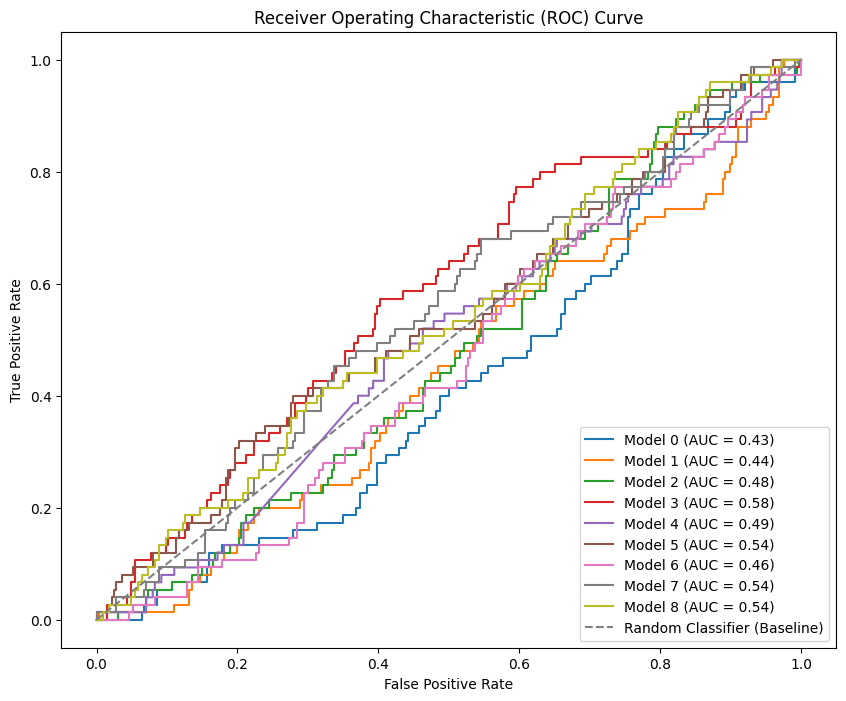

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a list or dictionary containing your Keras Sequential models model0 to model8
models = [model0, model1, model2, model3, model4, model5, model6, model7, model8]  # Update with your actual models

# Assuming X_test and y_test are your test features and target labels respectively
# Initialize a figure
plt.figure(figsize=(10, 8))

# Iterate through each model
for i, model in enumerate(models):
    # Make predictions on the test set
    y_pred_proba = model.predict(X_test)  # Assuming your models have a predict method

    # Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate area under ROC curve
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Model {i} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random classifier (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (Baseline)')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show plot
plt.show()







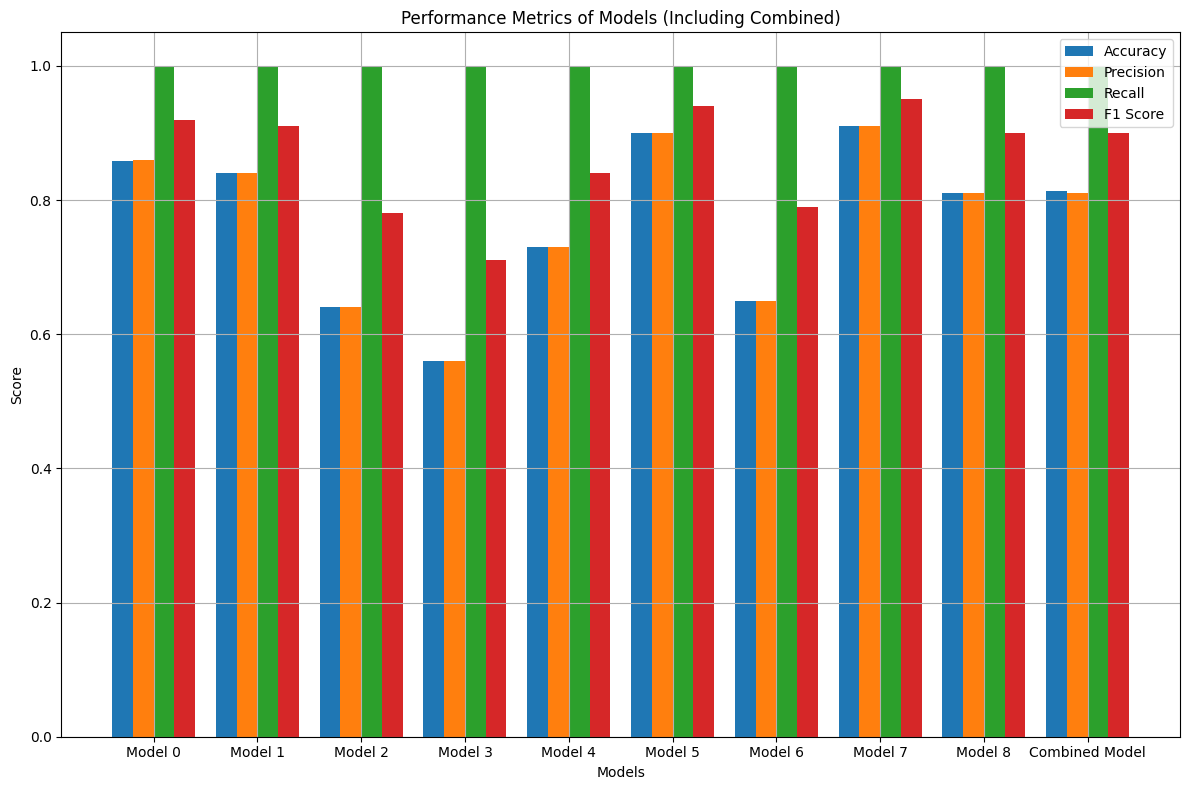

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have lists containing the performance metrics for each model
# Replace these lists with your actual data
models = [f'Model {i}' for i in range(9)]
accuracy_scores = [0.858, 0.84, 0.64, 0.56, 0.73, 0.90, 0.65, 0.91, 0.81]
precision_scores = [0.86, 0.84, 0.64, 0.56, 0.73, 0.90, 0.65, 0.91, 0.81]
recall_scores = [1, 1, 1, 1, 1, 1, 1, 1, 1]
f1_scores = [0.92, 0.91, 0.78, 0.71, 0.84, 0.94, 0.79, 0.95, 0.90]

# Performance metrics for the combined model
combined_accuracy = 0.813
combined_precision = 0.81
combined_recall = 1
combined_f1 = 0.90

# Append the combined model performance metrics to the respective lists
models.append('Combined Model')
accuracy_scores.append(combined_accuracy)
precision_scores.append(combined_precision)
recall_scores.append(combined_recall)
f1_scores.append(combined_f1)

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
index = np.arange(len(models))

# Plot metrics
plt.figure(figsize=(12, 8))

plt.bar(index, accuracy_scores, bar_width, label='Accuracy')
plt.bar(index + bar_width, precision_scores, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recall_scores, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Metrics of Models (Including Combined)')
plt.xticks(index + 1.5 * bar_width, models)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




